# PQC Haar Measure

In [3]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from qiskit import Aer
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from qiskit.providers.aer import AerSimulator
from copy import deepcopy

from loss_functions import *
from optimization import *
from quantum_maps import *
from quantum_tools import *
from utils import *
from experiments import *
from qiskit.providers.fake_provider import FakeCasablanca
#np.set_printoptions(threshold=sys.maxsize)

In [8]:
n = 3
d = 2**n

def pqc(n, L):
    theta_list = [np.random.uniform(-np.pi, np.pi, 2*n) for i in range(L)]
    circuit = qk.QuantumCircuit(n)
    for theta in theta_list:
        for i in range(n):
            circuit.ry(theta[i], i)
            circuit.rz(theta[i+n], i)

        for i in range(n-1):
            circuit.cx(i, i+1)
            
    return circuit
print(pqc(n, 1))

     ┌─────────────┐ ┌────────────┐          
q_0: ┤ Ry(-2.2838) ├─┤ Rz(2.5173) ├──■───────
     └┬────────────┤┌┴────────────┤┌─┴─┐     
q_1: ─┤ Ry(2.7124) ├┤ Rz(-2.8273) ├┤ X ├──■──
     ┌┴────────────┤└┬───────────┬┘└───┘┌─┴─┐
q_2: ┤ Ry(-2.7007) ├─┤ Rz(2.064) ├──────┤ X ├
     └─────────────┘ └───────────┘      └───┘


In [11]:
n = 3
d = 2**n

np.random.seed(42)
random.seed(42)

fid_list = []
bins = np.linspace(0, 1, 75)

F = (bins[1:] + bins[:-1])/2
P_Haar = (d - 1)*(1-F)**(d-2)
P_Haar = P_Haar/np.sum(P_Haar)

KL_list = []
for L in range(1, 11):
    for i in tqdm(range(10000)):
        U1 = Operator(pqc(n, L)).data
        U2 = Operator(pqc(n, L)).data
        fid = U1.T.conj()@U2
        fid_list.append(np.abs(fid[0,0])**2)
    
    P_pqc, bins = np.histogram(np.array(fid_list), bins = np.linspace(0, 1, 75))
    P_pqc = P_pqc/np.sum(P_pqc)
    KL = np.sum(P_pqc*np.log((P_pqc + 1e-32)/P_Haar))
    
    KL_list.append(KL)


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

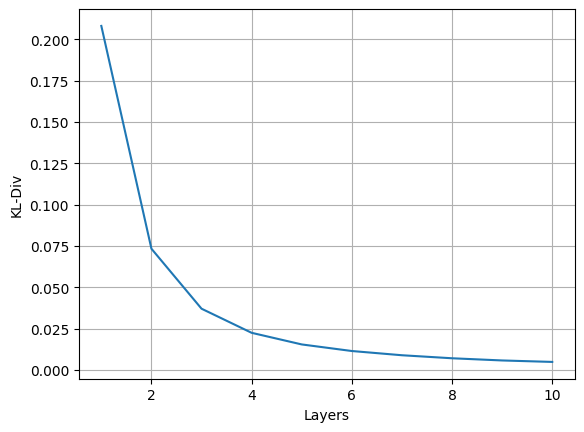

In [15]:
plt.plot(list(range(1,11)), KL_list)
plt.grid()
plt.xlabel("Layers")
plt.ylabel("KL-Div")
plt.show()

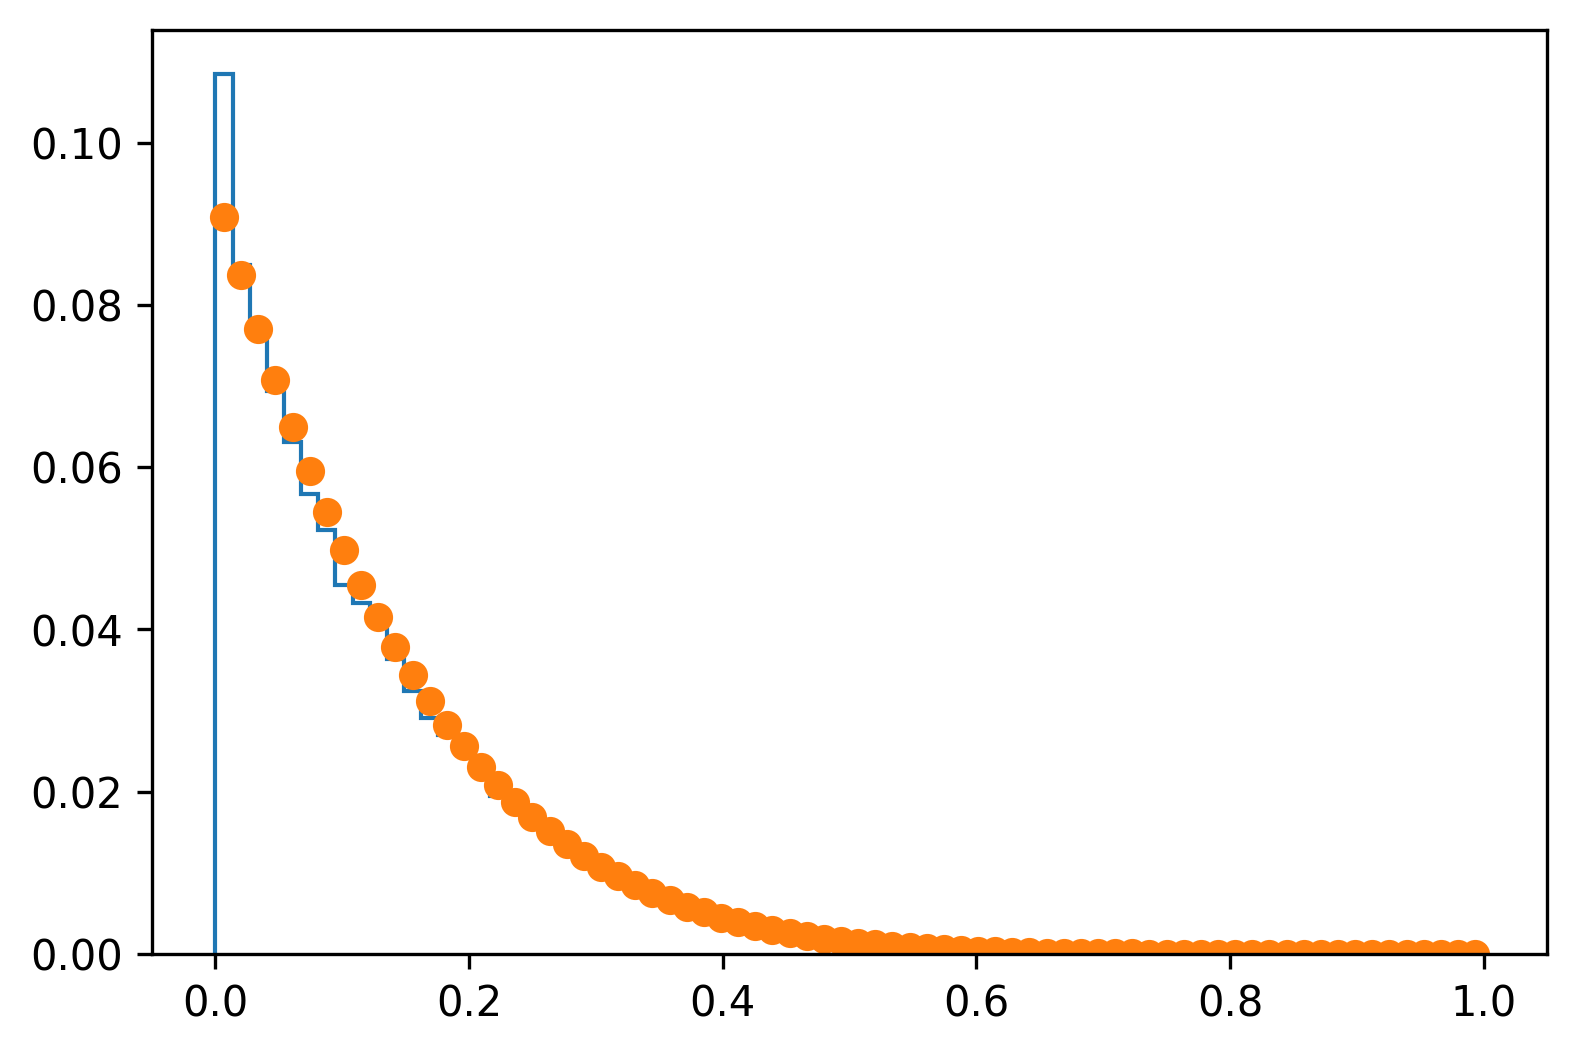

In [13]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.stairs(P_pqc, bins)
plt.plot(F, P_Haar, "o")
plt.show()

In [16]:
np.log(75)

4.31748811353631